#AIRBNB **DATASET**

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np
import random

random.seed(10)

Mounted at /content/gdrive


##Import

In [2]:
nyc_data = pd.read_csv('/content/gdrive/My Drive/df/listings_nyc.csv') # dati relativi a New York del 3 giugno 2022

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Functions definition

One Hot Encoding function:

In [3]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


# This function is used to create a One Hot Enconding for the variables needed. 
def OHE(df,col): 
  values = array(df[col])

  # integer encode
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(values)

  # binary encode
  onehot_encoder = OneHotEncoder(sparse=False)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

  for i in range(len(set(values))):
    df[list(set(values))[i]] = onehot_encoded.T[i]

  df = df.drop(columns=col)
  return df

NaN handling function:
- *NAtext*: I put a "" (blank space) if there is a Na
- *NAvalore*: I put a specific value if there is a Na

In [4]:
#This first function is used to see the sum of NaN values and to fill them with ‘‘’’
def NAtext(df):
  print('NaN values in the original {}: '.format(df.name),df.isna().sum())
  df = df.fillna("")
  print('NaN values after manipulation: ',df.isna().sum())
  return df


# While this function is used to replace the NaN values with a value of our interest. 
def NAvalore(df,valore):
  print('NaN values in the original {}: '.format(df.name),df.isna().sum())
  df = df.fillna(valore)
  print('NaN values after manipulation: ', df.isna().sum())
  return df

NaN checking function:

In [5]:
# This is just a check to see wheather there were NaN values in our variable or not.
def checkNA(df):
  return print('Number of NaN in {}: '.format(df.name), df.isna().sum())

In [6]:
from numpy import sin, cos, arccos, pi, round

def rad2deg(radians):
    degrees = radians * 180 / pi
    return degrees

def deg2rad(degrees):
    radians = degrees * pi / 180
    return radians


def getDistanceBetweenPointsNew(latitude1, longitude1, latitude2, longitude2, unit = 'miles'): 

    theta = longitude1 - longitude2
    
    distance = 60 * 1.1515 * rad2deg(
        arccos(
            (sin(deg2rad(latitude1)) * sin(deg2rad(latitude2))) + 
            (cos(deg2rad(latitude1)) * cos(deg2rad(latitude2)) * cos(deg2rad(theta)))
        )
    )
    
    if unit == 'miles':
        return round(distance, 2)
    if unit == 'kilometers':
        return round(distance * 1.609344, 2)

# Cleaning and data preparation

## First cleaning

Drop of some specific columns according to their meaning, NaN presence or redoundant information

In [7]:
nyc_data['price'] = nyc_data['price'].replace('[\$,]', '', regex=True).astype(float)
 
url_drop = list(nyc_data.filter(regex='url',axis=1))
oth_drop = ['scrape_id', "host_location",'host_response_rate', 'host_acceptance_rate',"host_neighbourhood",'neighbourhood', 'bathrooms', 'minimum_minimum_nights',
            'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 
            'has_availability', 'availability_30', 'availability_60', 'availability_90', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 
            'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value', 'license']


drop_list = oth_drop + url_drop
print("we drop:", drop_list)
nyc_data = nyc_data.drop(columns = drop_list)
print(nyc_data.shape)

we drop: ['scrape_id', 'host_location', 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood', 'bathrooms', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'listing_url', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url']
(37410, 41)


In [8]:
%%capture
nyc_data.host_response_time[nyc_data.host_response_time == "within an hour"] = 4.0
nyc_data.host_response_time[nyc_data.host_response_time == "within a few hours"] = 3.0
nyc_data.host_response_time[nyc_data.host_response_time == "within a day"] = 2.0
nyc_data.host_response_time[nyc_data.host_response_time == "a few days or more"] = 1.0
nyc_data.host_response_time[nyc_data.host_response_time == "Null"] = 0.0

In [9]:
#'Staten Island', 'Manhattan', 'Bronx', 'Brooklyn','Queens' 
nyc_data = pd.get_dummies(nyc_data, columns = ["neighbourhood_cleansed"])


## NaN values analysis and handling

In [10]:
for i in range(len(nyc_data.isna().sum())):
  if nyc_data.isna().sum()[i] > 0: 
    print(nyc_data.isna().sum().index[i])
    print(nyc_data.isna().sum()[i])


name
14
description
887
neighborhood_overview
14980
host_name
66
host_since
66
host_about
16356
host_response_time
13210
host_is_superhost
66
host_listings_count
66
host_total_listings_count
66
host_has_profile_pic
66
host_identity_verified
66
bathrooms_text
81
bedrooms
3654
beds
901
reviews_per_month
7949


--------------------------------------
For string variables, we decided to use the previously defined *NAtext* function:

In [11]:
#name 
nyc_data.name = NAtext(nyc_data.name)

#description
nyc_data.description = NAtext(nyc_data.description)

#neighborhood_overview
nyc_data.neighborhood_overview = NAtext(nyc_data.neighborhood_overview)

#host_about
nyc_data.host_about = NAtext(nyc_data.host_about) 

NaN values in the original name:  14
NaN values after manipulation:  0
NaN values in the original description:  887
NaN values after manipulation:  0
NaN values in the original neighborhood_overview:  14980
NaN values after manipulation:  0
NaN values in the original host_about:  16356
NaN values after manipulation:  0


-------------------------------------
Focus on 7 variables which all contain exactly 66 NaN:

- host_is_superhost
- host_has_profile_piC
- host_identity_verified
- host_listings_count
- host_total_listings_count
- host_since
- host_name

Do NaN values correspond to the same index? 

In [12]:
na_superhost = nyc_data.host_is_superhost[nyc_data.host_is_superhost.isna()].index
na_pic = nyc_data.host_has_profile_pic[nyc_data.host_has_profile_pic.isna()].index
na_verified = nyc_data.host_identity_verified[nyc_data.host_identity_verified.isna()].index
na_listing = nyc_data.host_listings_count[nyc_data.host_listings_count.isna()].index
na_totlisting = nyc_data.host_total_listings_count[nyc_data.host_total_listings_count.isna()].index
na_hostsince = nyc_data.host_since[nyc_data.host_since.isna()].index
na_name = nyc_data.host_name[nyc_data.host_name.isna()].index

na_pic == na_superhost
na_listing == na_verified
na_totlisting == na_hostsince
na_name == na_hostsince

na_superhost == na_verified
na_hostsince == na_verified

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

They correspond, thus we drop all these 66 indexes:

In [13]:
print(nyc_data.shape)
nyc_data = nyc_data.drop(list(set(na_pic)))
print(nyc_data.shape)

(37410, 283)
(37344, 283)


In [14]:
for i in range(len(nyc_data.isna().sum())):
  if nyc_data.isna().sum()[i] > 0: 
    print(nyc_data.isna().sum().index[i])
    print(nyc_data.isna().sum()[i]) 

host_response_time
13144
bathrooms_text
81
bedrooms
3643
beds
890
reviews_per_month
7925


----------------------------
Drop of NaN related to the following variables, because they are not so numerous:

- bathrooms_text (81)
- bedrooms (3643)
- beds (890)

In [15]:
#bedrooms
checkNA(nyc_data.bedrooms)
na_bedrooms = nyc_data[nyc_data.bedrooms.isna()].index

print(nyc_data.shape)
nyc_data = nyc_data.drop(list(set(na_bedrooms))) 
print(nyc_data.shape)

Number of NaN in bedrooms:  3643
(37344, 283)
(33701, 283)


In [16]:
#beds
checkNA(nyc_data.beds)
na_beds = nyc_data[nyc_data.beds.isna()].index

print(nyc_data.shape)
nyc_data = nyc_data.drop(list(set(na_beds))) 
print(nyc_data.shape)

Number of NaN in beds:  730
(33701, 283)
(32971, 283)


In [17]:
#bathrooms_text
checkNA(nyc_data.bathrooms_text)
na_bathtext = nyc_data.bathrooms_text[nyc_data.bathrooms_text.isna()].index

print(nyc_data.shape)
nyc_data = nyc_data.drop(list(set(na_bathtext))) # (37410, 4483)
print(nyc_data.shape)

Number of NaN in bathrooms_text:  32
(32971, 283)
(32939, 283)


-------------------
NaN handling for last two variables:

- reviews_per_month, according to its type (float) we decide to substitue with 0;
- host_response_time, according to its type (object) we decide to substitute with 'Null'

In [18]:
nyc_data.reviews_per_month = NAvalore(nyc_data.reviews_per_month,0)

NaN values in the original reviews_per_month:  6933
NaN values after manipulation:  0


In [19]:
nyc_data.host_response_time = NAvalore(nyc_data.host_response_time, "Null")

NaN values in the original host_response_time:  11609
NaN values after manipulation:  0


In [20]:
nyc_data = nyc_data.drop(columns = ["property_type", "name", "description", "last_scraped", 
                        "neighborhood_overview", "host_about"])

## Host_verifications

We create a list that include the different type of host verification (*'email', 'phone', 'work_email'*) and we create a dataset which columns correspond to elements of this list: for each row, 1 correspond to the presence of this host verification, 0 otherwise.

In [21]:
list_verification = nyc_data.host_verifications.apply(lambda z: [x.strip('[]" \'') for x in z.split(",")])

col_verification=[]
list_verification.apply(lambda z: [col_verification.append(x) for x in z if x not in col_verification])

#DF creation -- OHE
df_verification = pd.DataFrame(index=list_verification.index,columns = col_verification)

#fill
for elem in list_verification.index:
  for elem2 in list_verification[elem]: 
    df_verification.loc[df_verification.index == elem,elem2] = 1 


df_verification=df_verification.fillna(0)
df_verification = df_verification.drop(columns=[""])

In [22]:
try: 
  nyc_data = nyc_data.join(df_verification)
  nyc_data.drop(columns=["host_verifications"], inplace = True)
except: 
  print("Already cleaned")

Finally we merge the new dataset with the main one:

In [23]:
#to run just one time!
nyc_data.replace({'f': 0, 't': 1}, inplace=True)
nyc_data.replace({False: 0, True: 1}, inplace=True)
nyc_data.replace({'F': 0, 'T': 1}, inplace=True)

## Datetime conversion of time variables

In [24]:
#print(type(nyc_data.host_since.iloc[4]))
nyc_data['host_since'] = pd.to_datetime(nyc_data['host_since'], format='%Y-%m-%d')

#print(type(nyc_data.calendar_last_scraped.iloc[1]))
nyc_data['calendar_last_scraped'] = pd.to_datetime(nyc_data['calendar_last_scraped'], format='%Y-%m-%d')

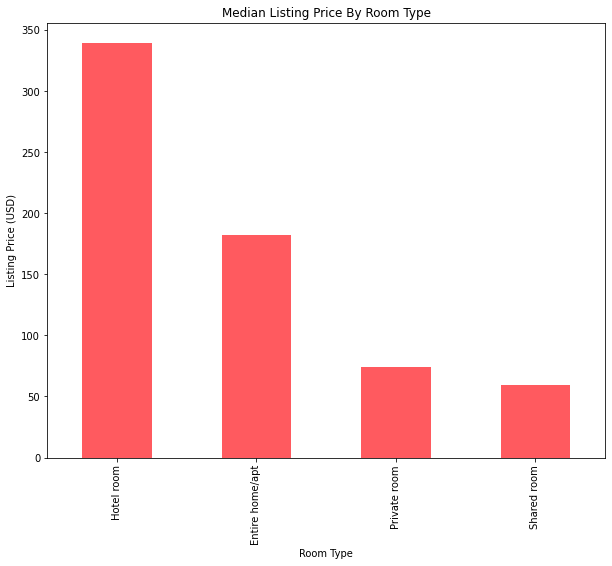

In [25]:
median_price_room_type = nyc_data.groupby('room_type')['price'].agg('median').sort_values(ascending = False)
np.round(median_price_room_type,2)
median_price_room_type.plot(kind = 'bar', title = 'Median Listing Price By Room Type', figsize=(10,8), color = '#FF5A5F')
_ = plt.xlabel('Room Type')
_ = plt.ylabel('Listing Price (USD)')

## One Hot Encoding:

- neighbourhood_group_cleansed
- room_type
- bathrooms_text

1) Neighbourhood_group_cleansed :

In [26]:
nyc_data = OHE(nyc_data,"neighbourhood_group_cleansed")

In [27]:
nyc_data.shape

(32939, 283)

---------------------------
### room_type

In [28]:
nyc_data['room_type'].unique()
nyc_data = pd.get_dummies(nyc_data, columns=["room_type"])


### Bathroom_text

we first observe that there are several different types of bathroom, that can be categorized in 3 main classes:
- Bath / private bath
- half_bath
- shared _bath

In [29]:
nyc_data['bathrooms_text'].unique()

array(['1.5 baths', '1 bath', '1 shared bath', '1 private bath',
       'Shared half-bath', '2 baths', '3 baths', 'Half-bath', '2.5 baths',
       '1.5 shared baths', '2 shared baths', '0 baths', '0 shared baths',
       'Private half-bath', '4.5 baths', '5.5 baths', '2.5 shared baths',
       '3.5 baths', '15.5 baths', '5 baths', '4 baths', '3 shared baths',
       '4 shared baths', '6 baths', '15 baths', '3.5 shared baths',
       '4.5 shared baths', '7.5 baths', '6.5 baths', '7 baths', '8 baths',
       '6 shared baths'], dtype=object)

So we homogenized the descriptions:

In [30]:
nyc_data.bathrooms_text = nyc_data['bathrooms_text'].replace('private|Private', '', regex=True)
nyc_data.bathrooms_text = nyc_data['bathrooms_text'].replace('baths', 'bath', regex=True)
nyc_data.bathrooms_text = nyc_data['bathrooms_text'].replace('Shared half-bath', '1 sharedhalf-bath', regex=True)
nyc_data.bathrooms_text = nyc_data['bathrooms_text'].replace('^half-bath|Half-bath', '1 half-bath', regex=True)
nyc_data.bathrooms_text = nyc_data['bathrooms_text'].replace('^ half-bath|Half-bath', '1 half-bath', regex=True)

In [31]:
nyc_data['shared_bath'] = ''
nyc_data['half_bath'] = ''
nyc_data['private_bath'] = ''

In [32]:
for i, row in nyc_data[['bathrooms_text']].iterrows():
  try:
    if 'half' in row[0]:
      el = nyc_data.bathrooms_text[i]
      nyc_data.loc[i,'half_bath']  = float(el[0:3])
    elif 'shared' in  row[0]:
      el = nyc_data.bathrooms_text[i]
      nyc_data.loc[i,'shared_bath']  = float(el[0:3])
    else:
      el = nyc_data.bathrooms_text[i]
      nyc_data.loc[i,'private_bath']  = float(el[0:3])
  except:
    if row[0] == np.nan:
      break
    if 'half' in row[0]:
      el = nyc_data.bathrooms_text[i]
      nyc_data.loc[i,'half_bath']  = float(el[0:2])
    elif 'shared' in  row[0]:
      el = nyc_data.bathrooms_text[i]
      nyc_data.loc[i,'shared_bath']  = float(el[0:2])
    else:
      el = nyc_data.bathrooms_text[i]
      nyc_data.loc[i,'private_bath']  = float(el[0:2])

In [33]:
del nyc_data['bathrooms_text']
nyc_data['shared_bath'] = nyc_data['shared_bath'].fillna(0).replace("",0)
nyc_data['half_bath'] = nyc_data['half_bath'].fillna(0).replace("",0)
nyc_data['private_bath'] = nyc_data['private_bath'].fillna(0).replace("",0)

nyc_data.shape

(32939, 288)

## Amenities

Creation of a counter for the amnities

In [34]:
nyc_data.amenities = nyc_data.amenities.apply(lambda z: [x.replace('"','') for x in z.split(",")])
nyc_data["amenities_counter"]  = nyc_data.amenities.apply(lambda x: len(x))

In [35]:
nyc_data.amenities

2        [[Dryer,  Heating,  Hair dryer,  Carbon monoxi...
3        [[Conditioner,  Essentials,  Extra pillows and...
4        [[Carbon monoxide alarm,  Heating,  Essentials...
5        [[Carbon monoxide alarm,  Shampoo,  Essentials...
6        [[Conditioner,  Essentials,  Clothing storage:...
                               ...                        
37404                          [[Long term stays allowed]]
37405    [[Conditioner,  Essentials,  Children\u2019s b...
37406    [[Essentials,  Bathtub,  Washer,  Extra pillow...
37407    [[Carbon monoxide alarm,  Heating,  Hair dryer...
37408    [[Essentials,  Bathtub,  Wifi,  Carbon monoxid...
Name: amenities, Length: 32939, dtype: object

In [36]:
nyc_data = nyc_data.drop(columns = "amenities")

## '**occupation class**' variable creation 

Analyzing the variable 'availability_365' we observe the presence of 12386 apartments that were not available to be booked. 
we do not consider them, in order to create a variable that give us an information about the occupation of the structure during the year

In [37]:
nyc_data ['availability_365'].value_counts()

0      12386
365      439
154      256
1        215
338      211
       ...  
204       21
253       21
226       19
234       19
222       15
Name: availability_365, Length: 366, dtype: int64

In [38]:
df = nyc_data.loc[nyc_data['availability_365'] != 0]
df.shape

(20553, 288)

Occupation rate is defined as the difference between total days of the year and days availability, divided by 365.

In [39]:
df['occupation_rate'] = (365 - df['availability_365'])/365
df.describe()['occupation_rate']

<ipython-input-39-724ee10240ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occupation_rate'] = (365 - df['availability_365'])/365


count    20553.000000
mean         0.473190
std          0.328251
min          0.000000
25%          0.158904
50%          0.479452
75%          0.789041
max          0.997260
Name: occupation_rate, dtype: float64

We also define a 'redditivity_index' that explain potential revenues of a structure, multiplying the price by the availabe days

In [40]:
df['redditivity_index'] =  (365 - df ['availability_365']) * df.price
df['redditivity_index']
df['redditivity_yearly_max'] =  365  * nyc_data.price

<ipython-input-40-5bd3edf5c359>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['redditivity_index'] =  (365 - df ['availability_365']) * df.price
<ipython-input-40-5bd3edf5c359>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['redditivity_yearly_max'] =  365  * nyc_data.price


'occupation_class' creation:

In [41]:
bins = [0, 0.25, 0.5, 0.75, 1]
labels = [0,1,2,3]
df["occupation_class"] = pd.cut(x = df['occupation_rate'], bins = bins, labels=labels, right = False)
df.groupby('occupation_class').size()

<ipython-input-41-303e687732a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["occupation_class"] = pd.cut(x = df['occupation_rate'], bins = bins, labels=labels, right = False)


occupation_class
0    7502
1    3043
2    4029
3    5979
dtype: int64

In [42]:
df['occupation_class'].isnull().sum()

0

## Final Dataset

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20553 entries, 2 to 37408
Columns: 292 entries, id to occupation_class
dtypes: category(1), datetime64[ns](2), float64(19), int64(21), object(2), uint8(247)
memory usage: 11.9+ MB


In [44]:
df.shape

(20553, 292)

In [45]:
df.columns

Index(['id', 'host_id', 'host_name', 'host_since', 'host_response_time',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       ...
       'room_type_Private room', 'room_type_Shared room', 'shared_bath',
       'half_bath', 'private_bath', 'amenities_counter', 'occupation_rate',
       'redditivity_index', 'redditivity_yearly_max', 'occupation_class'],
      dtype='object', length=292)

# Descriptive statistic

In [47]:
df.columns

Index(['id', 'host_id', 'host_name', 'host_since', 'host_response_time',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       ...
       'room_type_Private room', 'room_type_Shared room', 'shared_bath',
       'half_bath', 'private_bath', 'amenities_counter', 'occupation_rate',
       'redditivity_index', 'redditivity_yearly_max', 'occupation_class'],
      dtype='object', length=292)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


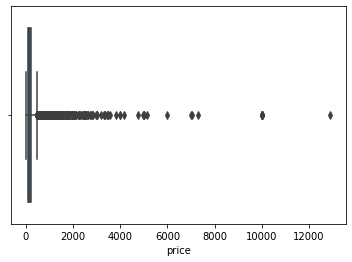

In [48]:
sns.boxplot(df.price)

[Text(0.5, 1.0, 'Distribution of prices')]

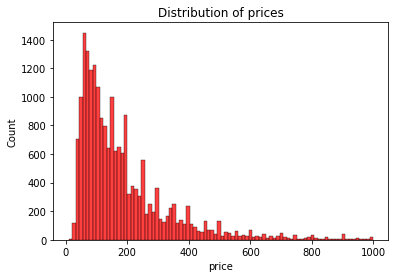

In [49]:
sns.histplot(df.price[df.price<1000], color='red').set(title='Distribution of prices')

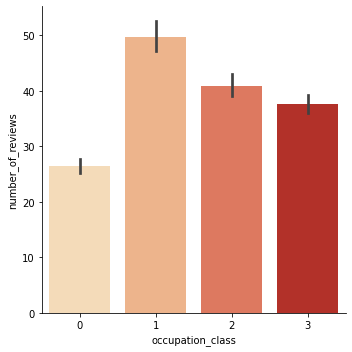

In [50]:
sns.catplot(data=df, x="occupation_class", y="number_of_reviews", kind="bar",palette='OrRd')

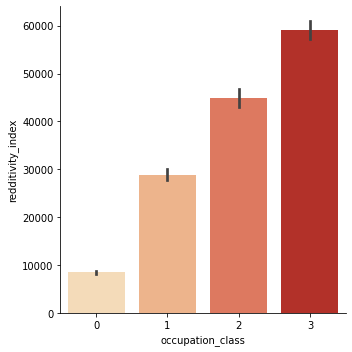

In [51]:
sns.catplot(data=df, x="occupation_class", y="redditivity_index", kind="bar",palette='OrRd')

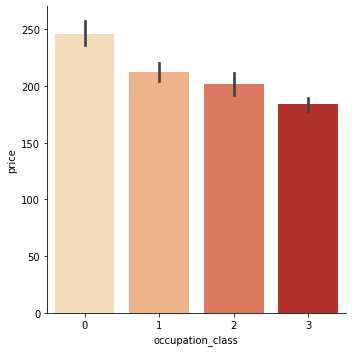

In [52]:
sns.catplot(data=df, x="occupation_class", y="price", kind="bar",palette='OrRd')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


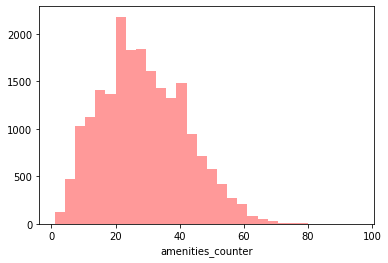

In [53]:
sns.distplot(df['amenities_counter'],kde=False,color='red',bins=30)

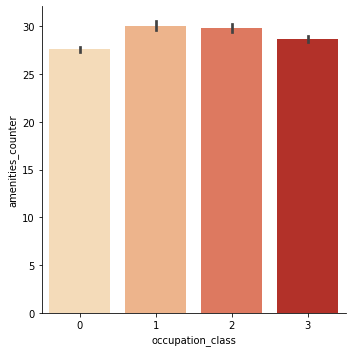

In [54]:
sns.catplot(data=df, x="occupation_class", y="amenities_counter", kind="bar",palette='OrRd')

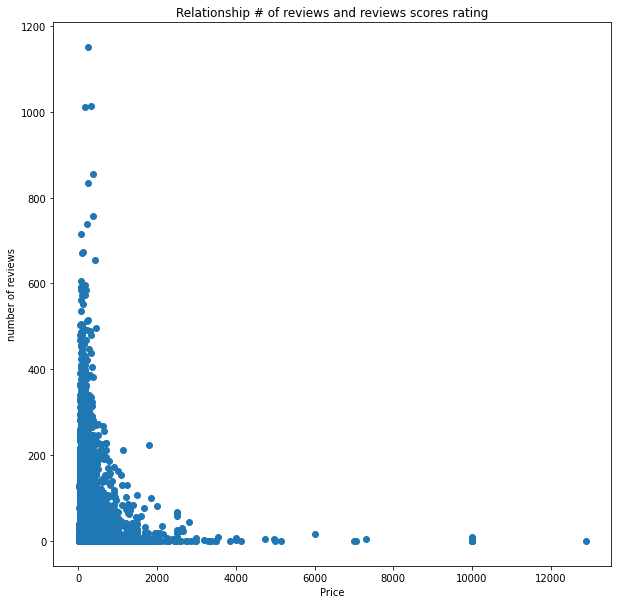

In [55]:
plt.figure(figsize=(10, 10))
plt.scatter(df.price, df.number_of_reviews)
plt.title('Relationship # of reviews and reviews scores rating')
plt.ylabel('number of reviews')
plt.xlabel('Price')
plt.show()

0    14782
1     5771
Name: host_is_superhost, dtype: int64

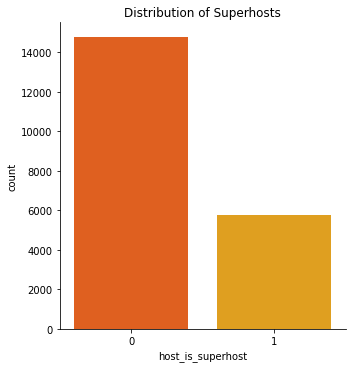

In [56]:
sns.catplot(x='host_is_superhost', kind="count", data=df, palette="autumn").set(title='Distribution of Superhosts')
df.host_is_superhost.value_counts()

<ipython-input-57-4db957dde33c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_is_superhost'] = df['host_is_superhost'].astype('int64')
<ipython-input-57-4db957dde33c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['beds'] = df['beds'].astype('int64')
<ipython-input-57-4db957dde33c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Bedrooms')]

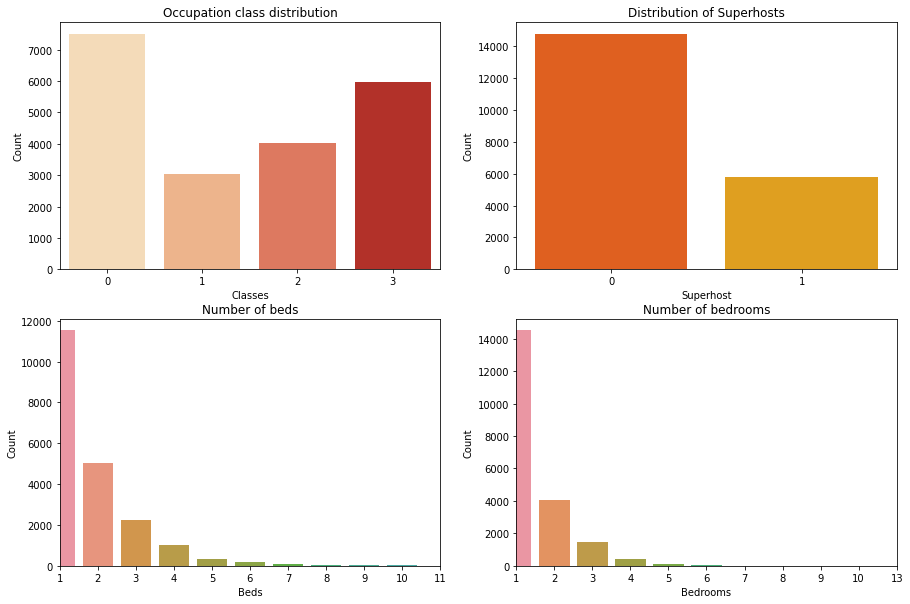

In [57]:
df['host_is_superhost'] = df['host_is_superhost'].astype('int64')
df['beds'] = df['beds'].astype('int64')
df['bedrooms'] = df['bedrooms'].astype('int64')

df['host_is_superhost'] = df['host_is_superhost'].astype('category')
df['beds'] = df['beds'].astype('category')
df['bedrooms'] = df['bedrooms'].astype('category')

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(ax=axs[0,0],x=df['occupation_class'],palette='OrRd')
axs[0, 0].set_title('Occupation class distribution')
axs[0,0].set(xlabel="Classes",ylabel="Count")
sns.countplot(ax=axs[0,1],x=df['host_is_superhost'],palette='autumn')
axs[0, 1].set_title('Distribution of Superhosts')
axs[0,1].set(xlabel="Superhost",ylabel="Count")
sns.countplot(ax=axs[1,0],x=df['beds'])
axs[1, 0].set_title('Number of beds')
axs[1,0].set_xlim([0, 10])
axs[1,0].set(xlabel="Beds",ylabel="Count")
sns.countplot(ax=axs[1,1],x=df['bedrooms'])
axs[1,1].set_xlim([0, 10])
axs[1,1].set_title('Number of bedrooms')
axs[1,1].set(xlabel="Bedrooms",ylabel="Count")

In [58]:
df_nb = df.copy()
df_nb['neighbourhood_group'] = (df_nb.iloc[:, 275:280] == 1).idxmax(1)

Text(0.5, 1.0, 'Density and distribution of prices for each neighbourhood')

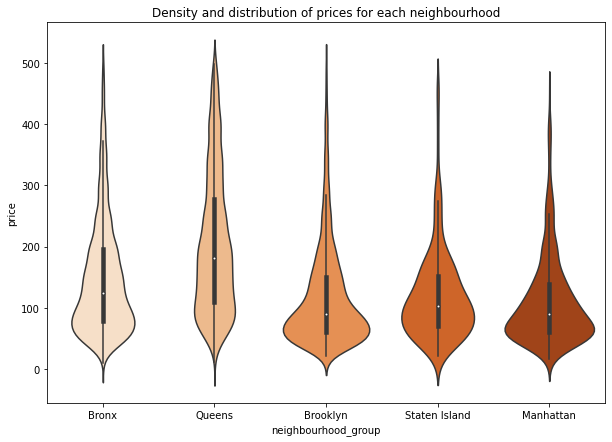

In [59]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization
fig, ax1 = plt.subplots(figsize=(10,7))

#creating a sub-dataframe with no extreme values / less than 500
sub_6=df_nb[df_nb.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price', palette = 'Oranges')
viz_2.set_title('Density and distribution of prices for each neighbourhood')

Text(0.5, 1.0, 'Distribution of each neighbourhood')

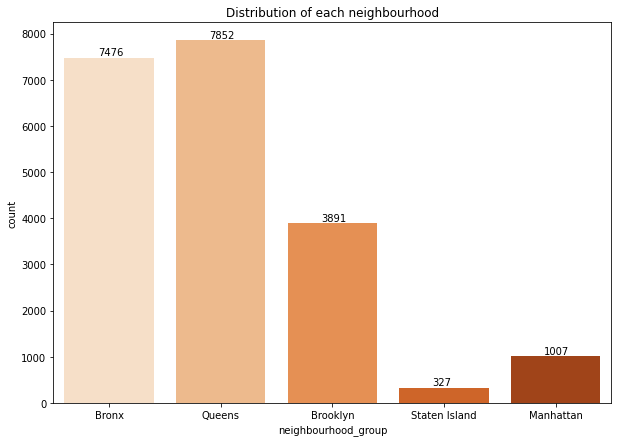

In [60]:
fig, ax1 = plt.subplots(figsize=(10,7))

ax = sns.countplot(x=df_nb['neighbourhood_group'],palette = 'Oranges')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+50))
ax.set_title('Distribution of each neighbourhood')

In [61]:
df_nb['neighbourhood_group'].value_counts()

Queens           7852
Bronx            7476
Brooklyn         3891
Manhattan        1007
Staten Island     327
Name: neighbourhood_group, dtype: int64

<ipython-input-62-24f0bb3377c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bronx'] = df['Bronx'].astype('int64')
<ipython-input-62-24f0bb3377c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Staten Island'] = df['Staten Island'].astype('int64')
<ipython-input-62-24f0bb3377c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

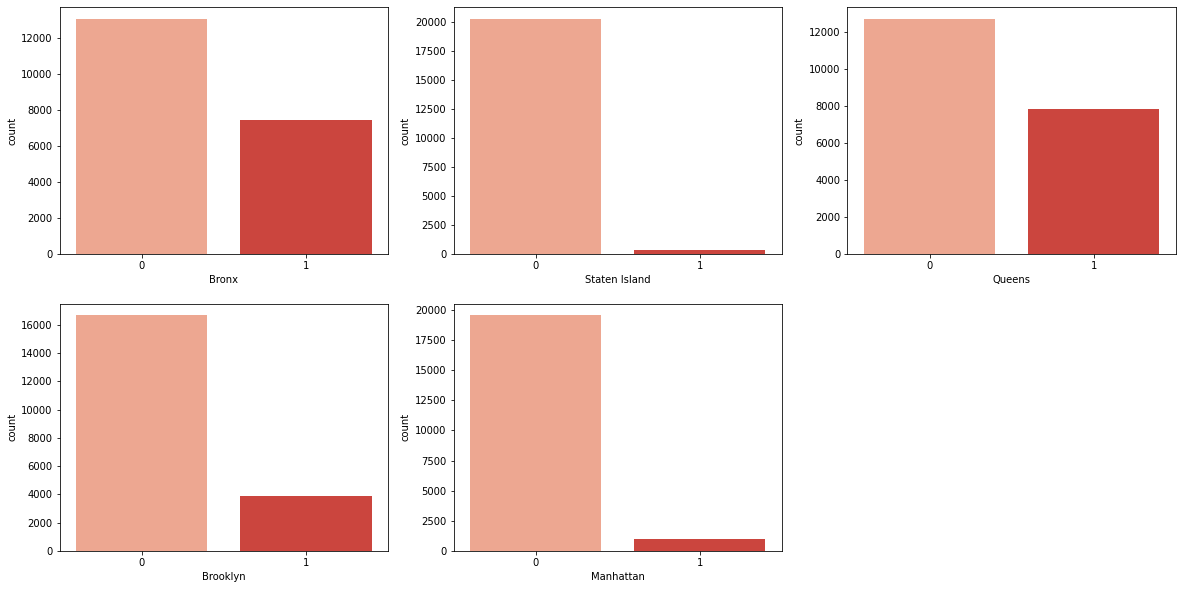

In [62]:
df['Bronx'] = df['Bronx'].astype('int64')
df['Staten Island'] = df['Staten Island'].astype('int64')
df['Queens'] = df['Queens'].astype('int64')
df['Brooklyn'] = df['Brooklyn'].astype('int64')
df['Manhattan'] = df['Manhattan'].astype('int64')

df['Bronx'] = df['Bronx'].astype('category')
df['Staten Island'] = df['Staten Island'].astype('category')
df['Queens'] = df['Queens'].astype('category')
df['Brooklyn'] = df['Brooklyn'].astype('category')
df['Manhattan'] = df['Manhattan'].astype('category')

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.countplot(ax=axes[0,0],x=df['Bronx'],palette='Reds')
sns.countplot(ax=axes[0,1],x=df['Staten Island'],palette='Reds')
sns.countplot(ax=axes[1,0],x=df['Brooklyn'],palette='Reds')
sns.countplot(ax=axes[1,1],x=df['Manhattan'],palette='Reds')
sns.countplot(ax=axes[0,2],x=df['Queens'],palette='Reds')
fig.delaxes(axes[1][2])

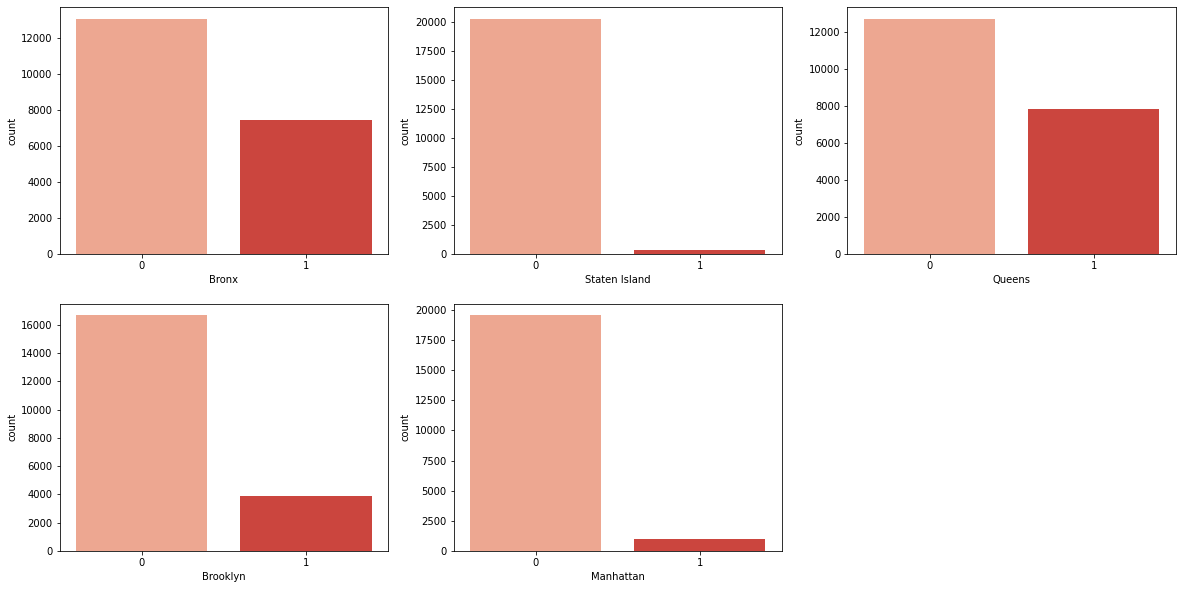

In [63]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.countplot(ax=axes[0,0],x=df['Bronx'],palette='Reds')
sns.countplot(ax=axes[0,1],x=df['Staten Island'],palette='Reds')
sns.countplot(ax=axes[1,0],x=df['Brooklyn'],palette='Reds')
sns.countplot(ax=axes[1,1],x=df['Manhattan'],palette='Reds')
sns.countplot(ax=axes[0,2],x=df['Queens'],palette='Reds')
fig.delaxes(axes[1][2])

# Pre processing

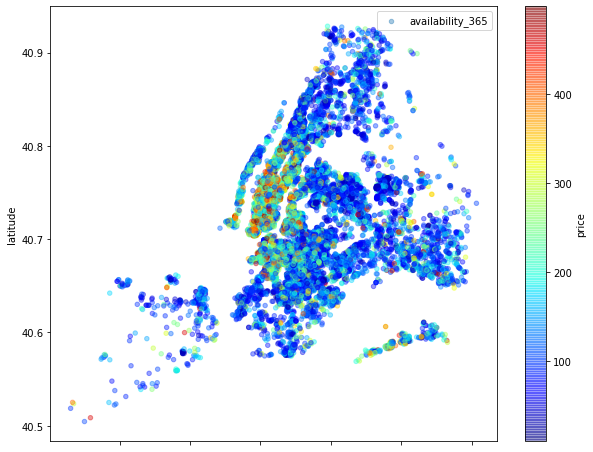

In [64]:
map=df[df.price < 500]
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out 
viz_4=map.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


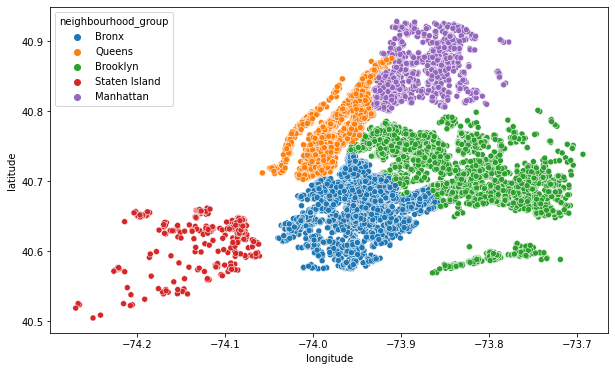

In [65]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_nb.longitude,df_nb.latitude,hue=df_nb.neighbourhood_group)
plt.ioff()

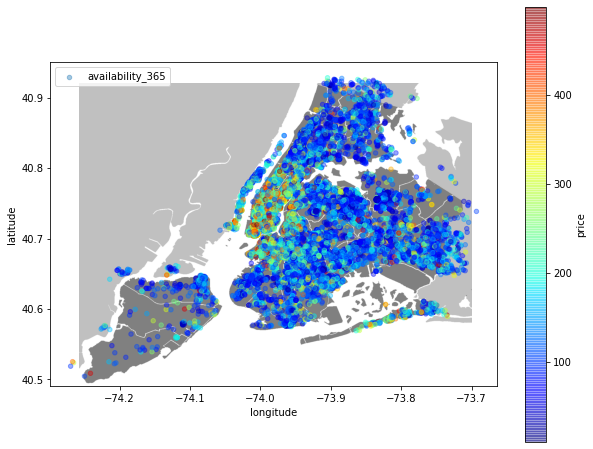

In [66]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
map.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

Latitude and longitude code with the aim of calculating the distance from focus points.

In [67]:
%%capture
#Statua della Libertà: 40.689249, -74.044500
#Times Square: 40.758896, -73.985130
#Empire State Building: 40.748817, -73.985428
#Rockefeller Center: 40.758678, -73.978798

latitude1 = 40.689249; longitude1 = -74.044500
df["firstPointDistance"] = df.apply(lambda x: getDistanceBetweenPointsNew(
    latitude1, longitude1, x['latitude'], x['longitude'], unit = 'miles'), axis = 1)

#Times Square: 40.758896, -73.985130
latitude1 = 40.758896; longitude1 = -73.985130
df["secondPointDistance"] = df.apply(lambda x: getDistanceBetweenPointsNew(
    latitude1, longitude1, x['latitude'], x['longitude'], unit = 'miles'), axis = 1)

#Empire State Building: 40.748817, -73.985428
latitude1 = 40.748817; longitude1 = -73.985428
df["thirdPointDistance"] = df.apply(lambda x: getDistanceBetweenPointsNew(
    latitude1, longitude1, x['latitude'], x['longitude'], unit = 'miles'), axis = 1)

#Rockefeller Center: 40.758678, -73.978798
latitude1 = 40.758678; longitude1 = -73.978798
df["fourthPointDistance"] = df.apply(lambda x: getDistanceBetweenPointsNew(
    latitude1, longitude1, x['latitude'], x['longitude'], unit = 'miles'), axis = 1)

Drop not important features 

In [68]:
df = df.drop(columns = ["id", "host_name", "host_id"])
df = df.drop(columns = ["calendar_last_scraped"])

df = df.drop(columns = ["latitude", "longitude"])
df = df.drop(columns = ['availability_365','redditivity_index', "redditivity_yearly_max"])

In [69]:
# for testing 
#df_sec = df.copy()
#df_sec
#df = df_sec.copy() 

In [70]:
'Staten Island', 'Manhattan', 'Bronx', 'Brooklyn','Queens' #RIPETIZIONE 

# feature selection SENZA le 200 feature aggiuntive
neighbourhood_cleansed_drop = list(df.filter(regex='neighbourhood_cleansed',axis=1))
df = df.drop(columns = neighbourhood_cleansed_drop)
# feature selection.. con 280 variabili diventa un po' un casino

Datetime value which indicates the period of time the user is registered.

In [71]:
df.host_since = df.host_since.apply(lambda t: ((datetime.now() - t).days)/365) 

## Scale data 

In [72]:
pd.set_option('display.max_columns', None)

In [73]:
#convet from to int to categorical variables
#neighbourhood_cleansed_drop = list(df.filter(regex='neighbourhood_cleansed',axis=1))

tocat = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "instant_bookable", 
"email", "phone", "work_email", "Brooklyn", "Brooklyn", "Queens", "Manhattan", "Staten Island",
"Bronx", "room_type_Entire home/apt", "room_type_Hotel room",	"room_type_Private room", "room_type_Shared room" ]# + neighbourhood_cleansed_drop
for elem in tocat: 
  df[elem] = pd.Categorical(df[elem])

In [74]:
numerics = ["uint8",'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dfNum = df.select_dtypes(include=numerics)

In [75]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for elem in dfNum.columns: 
  #print(elem)
  mom = dfNum[elem]
  df[elem] = scaler.fit_transform(mom.array.reshape(-1, 1))

# Forecasting model: supervised (Linear Regression (occupation_rate))

Since we want to have somehow a basis level of predictions, we considered the linear model. Unfortunately, since our mission is to detect the occupation class (4 classes), we ahve to change our response variable Y using the occupation rate. This value is a generic percentage in a range of 0-100%, which is higly correlated with the occupation class since there is a linear relationship. 

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [77]:
X = df.drop(columns=['occupation_rate', "occupation_class"])
y = df['occupation_rate']

In [78]:
numerics = ["uint8",'int16', 'int32', 'int64', 'float16', 'float32', 'float64', "category"]
x = X.select_dtypes(include=numerics)

x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=4)
x_train, x_valid, y_train, y_valid  = train_test_split(x_train_80, y_train_80, test_size=0.25, random_state=4)

x.shape, x_train.shape, x_valid.shape, x_test.shape

((20553, 41), (12331, 41), (4111, 41), (4111, 41))

In [79]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)

LinearRegression()

In [80]:
y_pred_train = model.predict(x_train)
y_pred_valid = model.predict(x_valid)
y_pred_test = model.predict(x_test)

In [81]:
from sklearn.metrics import mean_squared_error

print ("Train Error: {:.3f}".format(mean_squared_error(y_true = y_train, y_pred = y_pred_train)))
print ("Validation Error : {:.3f}".format(mean_squared_error(y_true = y_valid, y_pred = y_pred_valid)))
print ("Test Error : {:.3f}".format( mean_squared_error(y_true = y_test,  y_pred = y_pred_test)))

Train Error: 0.098
Validation Error : 0.096
Test Error : 0.095


Looking on the values we that our results are not that good in predicting

# Features selection

 In case of machine learning we can use feature selection to help our AI interpret better values. 
 In this case we detect which variables are the most important, creating a reduced dataframe full of relevant X's. 

## Creation of the environment

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [83]:
Xz = df.drop(columns=["occupation_class","occupation_rate"]) 
X = Xz.select_dtypes(include=numerics)
y = df['occupation_class']

In [84]:
# splitting 60 train_set - 20 validation_ser - 20 test_set 
X_train_80, X_test, y_train_80, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid  = train_test_split(X_train_80, y_train_80, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape

(13770, 41)

## Selection

In [85]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=40) 
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=40)

In [86]:
best_features = np.argsort(rf.feature_importances_)[::-1] 

In [87]:
a = rf.feature_importances_

In [88]:
len(best_features)

41

In [89]:
from sklearn.model_selection import cross_val_score

best_features = np.argsort(a)[::-1]

rmse = []

for f in range(1,len(best_features)+1):
    rf_small = RandomForestRegressor(n_estimators=20)
    scores = cross_val_score(rf_small, 
                             X_train.iloc[:,best_features[:f]], y_train, 
                             cv=5, scoring='neg_mean_squared_error')
    rmse += [-scores.mean()]
    #print(f)
    

Text(0.5, 0, 'Number of Best features used')

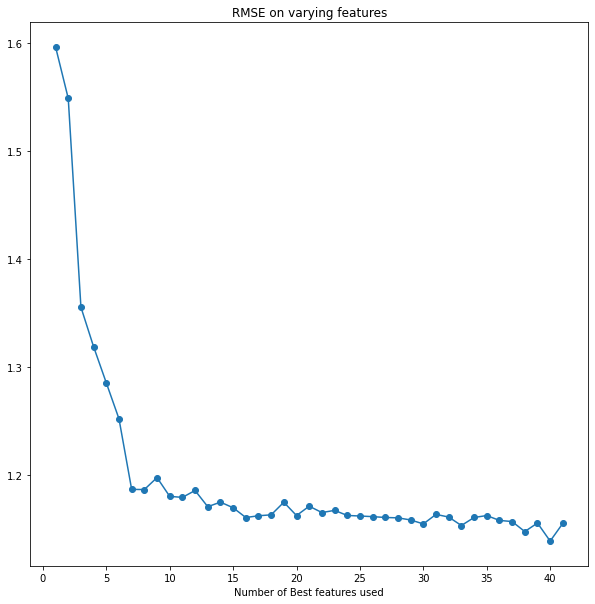

In [90]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(range(1,len(best_features)+1), rmse, 'o-', label="RMSE")
ax.set_title("RMSE on varying features")
ax.set_xlabel("Number of Best features used")

In [91]:
best_features = np.argsort(a)[:-11:-1]
best_features
X_selfeat = X_train.iloc[:,best_features]
X_selfeatest = X_test.iloc[:,best_features]
X_selfeatvalid = X_valid.iloc[:,best_features]

In [92]:
best_features_col = list(X_train.iloc[:,best_features].columns) + ["occupation_class"]
df_red = df[best_features_col]

In [93]:
best_features_col #these are the best features for ML (+ our Y occupation class)

['host_since',
 'price',
 'thirdPointDistance',
 'firstPointDistance',
 'amenities_counter',
 'maximum_nights',
 'calculated_host_listings_count',
 'calculated_host_listings_count_private_rooms',
 'reviews_per_month',
 'number_of_reviews',
 'occupation_class']

# Forecasting models: supervised

## Creation of the environment (entire DF)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [95]:
#DF intero
Xz = df.drop(columns=["occupation_class","occupation_rate"]) 
X = Xz.select_dtypes(include=numerics)
y = df['occupation_class']

In [96]:
#DF ridotto 
'''
Xz = df_red.drop(columns=["occupation_class"]) 
X = Xz.select_dtypes(include=numerics)
y = df_red['occupation_class']
'''

'\nXz = df_red.drop(columns=["occupation_class"]) \nX = Xz.select_dtypes(include=numerics)\ny = df_red[\'occupation_class\']\n'

In [97]:
# splitting 60 train_set - 20 validation_ser - 20 test_set 
X_train_80, X_test, y_train_80, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid  = train_test_split(X_train_80, y_train_80, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Decision Tree 

As a first step we tune the max number of final leaves, detecting the best performance. 

In [98]:
best_acc = 0; value = 0
for max_leaves in range(2,30): 
    # train and predict
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
    val_acc = accuracy_score(y_true = y_valid, y_pred = dt.predict(X_valid))
    test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))
    print ("N. of leaves: {} - Train Accuracy: {:.3f} - Validation Accuracy: {:.3f} - Test Accuracy: {:.3f}".format(max_leaves,train_acc,val_acc,test_acc) )

N. of leaves: 2 - Train Accuracy: 0.387 - Validation Accuracy: 0.380 - Test Accuracy: 0.392
N. of leaves: 3 - Train Accuracy: 0.404 - Validation Accuracy: 0.397 - Test Accuracy: 0.409
N. of leaves: 4 - Train Accuracy: 0.445 - Validation Accuracy: 0.439 - Test Accuracy: 0.451
N. of leaves: 5 - Train Accuracy: 0.445 - Validation Accuracy: 0.439 - Test Accuracy: 0.451
N. of leaves: 6 - Train Accuracy: 0.455 - Validation Accuracy: 0.446 - Test Accuracy: 0.459
N. of leaves: 7 - Train Accuracy: 0.455 - Validation Accuracy: 0.446 - Test Accuracy: 0.459
N. of leaves: 8 - Train Accuracy: 0.455 - Validation Accuracy: 0.446 - Test Accuracy: 0.459
N. of leaves: 9 - Train Accuracy: 0.458 - Validation Accuracy: 0.448 - Test Accuracy: 0.462
N. of leaves: 10 - Train Accuracy: 0.460 - Validation Accuracy: 0.448 - Test Accuracy: 0.462
N. of leaves: 11 - Train Accuracy: 0.461 - Validation Accuracy: 0.449 - Test Accuracy: 0.464
N. of leaves: 12 - Train Accuracy: 0.461 - Validation Accuracy: 0.449 - Test A

from this we select the tree with the best value of accuracy: the one with 26 leaves

In [99]:
dt = DecisionTreeClassifier(max_leaf_nodes=26)
dt.fit(X_train,y_train)

# compute Accuracy
'''train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
val_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))'''

train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
val_acc = accuracy_score(y_true = y_valid, y_pred = dt.predict(X_valid))
test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))

In [100]:
allResults = pd.DataFrame(columns = ["model","train_acc","val_acc","test_acc"])
allResults.loc[1] = "decision tree (leaves 24)", train_acc, val_acc, test_acc

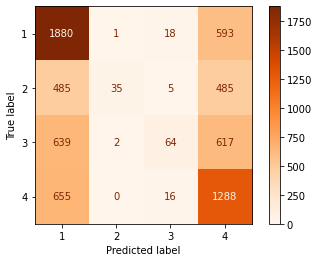

In [111]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn import metrics

y_test_pred = dt.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1,2,3,4])

cm_display.plot(cmap='Oranges')
plt.show()

As we can see there are not big improvements in accuracy increasing the number of leaves, therefore we can focus on full grown trees. 

In [112]:
for max_depth in range(20,30): 
    # train and predict
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
    val_acc = accuracy_score(y_true = y_valid, y_pred = dt.predict(X_valid))
    test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))
    print ("Depth: {} - Train Accuracy: {:.3f} - Validation Accuracy: {:.3f} - Test Accuracy: {:.3f}".format(max_depth,train_acc,val_acc,test_acc) )

Depth: 20 - Train Accuracy: 0.950 - Validation Accuracy: 0.874 - Test Accuracy: 0.449
Depth: 21 - Train Accuracy: 0.964 - Validation Accuracy: 0.880 - Test Accuracy: 0.444
Depth: 22 - Train Accuracy: 0.976 - Validation Accuracy: 0.885 - Test Accuracy: 0.438
Depth: 23 - Train Accuracy: 0.984 - Validation Accuracy: 0.895 - Test Accuracy: 0.443
Depth: 24 - Train Accuracy: 0.989 - Validation Accuracy: 0.899 - Test Accuracy: 0.443
Depth: 25 - Train Accuracy: 0.993 - Validation Accuracy: 0.900 - Test Accuracy: 0.442
Depth: 26 - Train Accuracy: 0.996 - Validation Accuracy: 0.906 - Test Accuracy: 0.440
Depth: 27 - Train Accuracy: 0.998 - Validation Accuracy: 0.905 - Test Accuracy: 0.436
Depth: 28 - Train Accuracy: 0.999 - Validation Accuracy: 0.906 - Test Accuracy: 0.438
Depth: 29 - Train Accuracy: 1.000 - Validation Accuracy: 0.909 - Test Accuracy: 0.440


We got a good value of accuracy in the train e and validation set, but in the accuracy there is a worste value

In [113]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

    # compute Accuracy
train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
val_acc = accuracy_score(y_true = y_valid, y_pred = dt.predict(X_valid))
test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))
print ("Train Accuracy: {:.3f} - Validation Accuracy: {:.3f} - Test Accuracy: {:.3f}".format(train_acc,val_acc,test_acc) )

Train Accuracy: 1.000 - Validation Accuracy: 0.909 - Test Accuracy: 0.433


In [114]:
allResults.loc[2] = "decision tree (fully grown)", train_acc, val_acc, test_acc

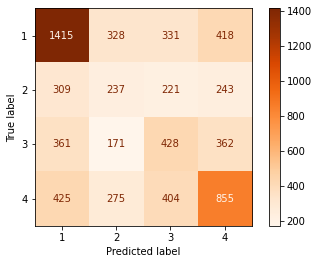

In [115]:
#confusion matrix
y_test_pred = dt.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1,2,3,4])

cm_display.plot(cmap='Oranges')
plt.show()

In [116]:
allResults

,model,train_acc,val_acc,test_acc
1,decision tree (leaves 24),0.485984,0.474824,0.481645
2,decision tree (fully grown),0.999927,0.908781,0.432699


## Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

for t in range(10,40): 
    # train a decision tree classifier
    rand_f = RandomForestClassifier(n_estimators=t)
    model_train = rand_f.fit(X_train,y_train)
    train_acc = accuracy_score(y_true = y_train, y_pred = model_train.predict(X_train))
    val_acc = accuracy_score(y_true = y_valid, y_pred = model_train.predict(X_valid))
    test_acc  = accuracy_score(y_true = y_test,  y_pred = model_train.predict(X_test))
    print ("Train Accuracy: {:.3f} - Validation Accuracy: {:.3f} - Test Accuracy: {:.3f} - trees: {}".format(train_acc,val_acc,test_acc,t) )

Train Accuracy: 0.984 - Validation Accuracy: 0.902 - Test Accuracy: 0.498 - trees: 10
Train Accuracy: 0.989 - Validation Accuracy: 0.905 - Test Accuracy: 0.509 - trees: 11
Train Accuracy: 0.990 - Validation Accuracy: 0.909 - Test Accuracy: 0.509 - trees: 12
Train Accuracy: 0.993 - Validation Accuracy: 0.909 - Test Accuracy: 0.516 - trees: 13
Train Accuracy: 0.993 - Validation Accuracy: 0.910 - Test Accuracy: 0.510 - trees: 14
Train Accuracy: 0.994 - Validation Accuracy: 0.913 - Test Accuracy: 0.508 - trees: 15
Train Accuracy: 0.995 - Validation Accuracy: 0.911 - Test Accuracy: 0.511 - trees: 16
Train Accuracy: 0.997 - Validation Accuracy: 0.911 - Test Accuracy: 0.511 - trees: 17
Train Accuracy: 0.997 - Validation Accuracy: 0.912 - Test Accuracy: 0.522 - trees: 18
Train Accuracy: 0.998 - Validation Accuracy: 0.917 - Test Accuracy: 0.517 - trees: 19
Train Accuracy: 0.998 - Validation Accuracy: 0.917 - Test Accuracy: 0.523 - trees: 20
Train Accuracy: 0.998 - Validation Accuracy: 0.919 - T

In [118]:
rand_f = RandomForestClassifier(n_estimators=38)
model_train = rand_f.fit(X_train,y_train)
train_acc = accuracy_score(y_true = y_train, y_pred = model_train.predict(X_train))
val_acc = accuracy_score(y_true = y_valid, y_pred = model_train.predict(X_valid))
test_acc  = accuracy_score(y_true = y_test,  y_pred = model_train.predict(X_test))

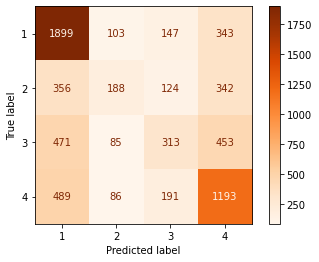

In [119]:
#confusion matrix
y_test_pred = rand_f.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1,2,3,4])

cm_display.plot(cmap='Oranges')
plt.show()

In [120]:
allResults.loc[3] = "Random forest", train_acc, val_acc, test_acc
allResults

,model,train_acc,val_acc,test_acc
1,decision tree (leaves 24),0.485984,0.474824,0.481645
2,decision tree (fully grown),0.999927,0.908781,0.432699
3,Random forest,0.999637,0.916565,0.529707


# Neural network (Keras)

### Neural network

In [121]:
from sklearn.model_selection import train_test_split
import keras
keras.__version__

'2.9.0'

In [122]:
y = array(y).reshape(-1,1)
X = array(X)

X_train_80, X_test, y_train_80, y_test = train_test_split( X, y, test_size=0.20, random_state=4)
X_train, X_valid, y_train, y_valid  = train_test_split(X_train_80, y_train_80, test_size=0.25, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [123]:
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [124]:
length, features = X_train.shape
features

41

In [125]:
from keras import models
from keras import layers

network = models.Sequential() 

network.add(layers.Dense(4000, activation='relu', input_shape=(features*1,)))
network.add(layers.Dense(2000, activation='relu'))
network.add(layers.Dense(1000, activation='relu'))
network.add(layers.Dense(500, activation='relu'))
network.add(layers.Dense(250, activation='relu'))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(50, activation='relu'))
network.add(layers.Dense(25, activation='relu'))
network.add(layers.Dense(4, activation='softmax')) 

In [126]:
network_2 = models.Sequential() 
network_2.add(layers.Dense(2000, activation='relu', input_shape=(features*1,)))
network_2.add(layers.Dense(500, activation='relu'))
network_2.add(layers.Dense(250, activation='relu'))
network_2.add(layers.Dense(100, activation='relu'))
network_2.add(layers.Dense(25, activation='relu'))
network_2.add(layers.Dense(4, activation='softmax')) 

In [127]:
network_3 = models.Sequential() 
network_3.add(layers.Dense(100, activation='relu', input_shape=(features*1,)))
network_3.add(layers.Dense(50, activation='relu'))
network_3.add(layers.Dense(10, activation='relu'))
network_3.add(layers.Dense(4, activation='softmax'))

In [128]:
#compile --> get the network ready
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])   

network_2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy', 
                metrics=['accuracy'])  

network_3.compile(optimizer='rmsprop',
                loss='categorical_crossentropy', 
                metrics=['accuracy'])  

In [129]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [130]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [131]:
big_nn = network.fit(X_train, train_labels, epochs=20, batch_size=500,validation_data=(X_test, test_labels))

Epoch 1/20
28/28 [==============================] - 28s 936ms/step - loss: 1.4184 - accuracy: 0.3518 - val_loss: 1.3053 - val_accuracy: 0.3677
Epoch 2/20
28/28 [==============================] - 24s 860ms/step - loss: 1.3217 - accuracy: 0.3747 - val_loss: 1.2817 - val_accuracy: 0.4172
Epoch 3/20
28/28 [==============================] - 24s 865ms/step - loss: 1.2805 - accuracy: 0.4176 - val_loss: 1.2561 - val_accuracy: 0.4404
Epoch 4/20
28/28 [==============================] - 24s 853ms/step - loss: 1.2614 - accuracy: 0.4316 - val_loss: 1.3111 - val_accuracy: 0.4177
Epoch 5/20
28/28 [==============================] - 24s 848ms/step - loss: 1.2375 - accuracy: 0.4472 - val_loss: 1.2385 - val_accuracy: 0.4519
Epoch 6/20
28/28 [==============================] - 23s 838ms/step - loss: 1.2366 - accuracy: 0.4465 - val_loss: 1.2310 - val_accuracy: 0.4601
Epoch 7/20
28/28 [==============================] - 24s 849ms/step - loss: 1.2209 - accuracy: 0.4587 - val_loss: 1.2287 - val_accuracy: 0.4330

In [132]:
medium_nn = network_2.fit(X_train, train_labels, epochs=20, batch_size=500,validation_data=(X_test, test_labels))

Epoch 1/20
28/28 [==============================] - 4s 109ms/step - loss: 1.3315 - accuracy: 0.3641 - val_loss: 1.2846 - val_accuracy: 0.4239
Epoch 2/20
28/28 [==============================] - 3s 107ms/step - loss: 1.2792 - accuracy: 0.4198 - val_loss: 1.2589 - val_accuracy: 0.4244
Epoch 3/20
28/28 [==============================] - 3s 107ms/step - loss: 1.2553 - accuracy: 0.4278 - val_loss: 1.2512 - val_accuracy: 0.4358
Epoch 4/20
28/28 [==============================] - 3s 107ms/step - loss: 1.2353 - accuracy: 0.4428 - val_loss: 1.2548 - val_accuracy: 0.4336
Epoch 5/20
28/28 [==============================] - 3s 109ms/step - loss: 1.2273 - accuracy: 0.4501 - val_loss: 1.2252 - val_accuracy: 0.4454
Epoch 6/20
28/28 [==============================] - 3s 98ms/step - loss: 1.2159 - accuracy: 0.4564 - val_loss: 1.2172 - val_accuracy: 0.4612
Epoch 7/20
28/28 [==============================] - 3s 102ms/step - loss: 1.2112 - accuracy: 0.4562 - val_loss: 1.2101 - val_accuracy: 0.4690
Epoch 8

In [133]:
small_nn = network_3.fit(X_train, train_labels, epochs=20, batch_size=500,validation_data=(X_test, test_labels))

Epoch 1/20
28/28 [==============================] - 1s 13ms/step - loss: 1.3300 - accuracy: 0.3579 - val_loss: 1.3149 - val_accuracy: 0.3762
Epoch 2/20
28/28 [==============================] - 0s 7ms/step - loss: 1.3069 - accuracy: 0.3786 - val_loss: 1.3016 - val_accuracy: 0.3805
Epoch 3/20
28/28 [==============================] - 0s 8ms/step - loss: 1.2950 - accuracy: 0.3898 - val_loss: 1.2953 - val_accuracy: 0.3908
Epoch 4/20
28/28 [==============================] - 0s 7ms/step - loss: 1.2855 - accuracy: 0.4012 - val_loss: 1.2784 - val_accuracy: 0.4230
Epoch 5/20
28/28 [==============================] - 0s 8ms/step - loss: 1.2784 - accuracy: 0.4148 - val_loss: 1.2705 - val_accuracy: 0.4209
Epoch 6/20
28/28 [==============================] - 0s 9ms/step - loss: 1.2695 - accuracy: 0.4259 - val_loss: 1.2684 - val_accuracy: 0.4205
Epoch 7/20
28/28 [==============================] - 0s 7ms/step - loss: 1.2636 - accuracy: 0.4291 - val_loss: 1.2593 - val_accuracy: 0.4321
Epoch 8/20
28/28 [=

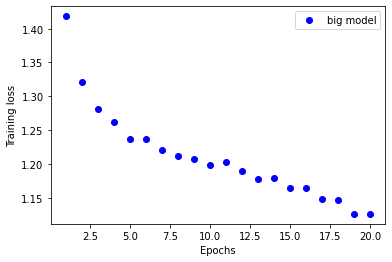

In [134]:
epochs = range(1, 21)

original_train_loss = big_nn.history['loss']


plt.plot(epochs, original_train_loss, 'bo', label='big model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

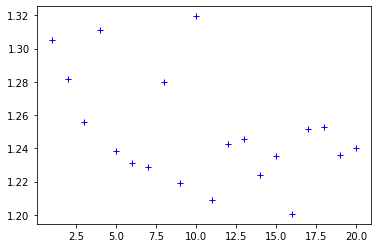

In [135]:
big_val_loss = big_nn.history['val_loss']

plt.plot(epochs, big_val_loss, 'b+', label='big model')


In [136]:
test_loss, test_acc = network.evaluate(X_test, test_labels)
allResults.loc[4] = "neural network (big)", big_nn.history["accuracy"][-1], big_nn.history["val_accuracy"][-1], test_acc
test_loss, test_acc = network_2.evaluate(X_test, test_labels)
allResults.loc[5] = "neural network (medium)", medium_nn.history["accuracy"][-1], medium_nn.history["val_accuracy"][-1], test_acc
test_loss, test_acc = network_3.evaluate(X_test, test_labels)
allResults.loc[6] = "neural network (small)", small_nn.history["accuracy"][-1], small_nn.history["val_accuracy"][-1], test_acc

212/212 [==============================] - 0s 2ms/step - loss: 1.2262 - accuracy: 0.4637


In [138]:
allResults

,model,train_acc,val_acc,test_acc
1,decision tree (leaves 24),0.485984,0.474824,0.481645
2,decision tree (fully grown),0.999927,0.908781,0.432699
3,Random forest,0.999637,0.916565,0.529707
4,neural network (big),0.501598,0.464986,0.464986
5,neural network (medium),0.509586,0.483709,0.483709
6,neural network (small),0.463689,0.463659,0.463659


## NN with selected features

In [137]:
best_features_col

['host_since',
 'price',
 'thirdPointDistance',
 'firstPointDistance',
 'amenities_counter',
 'maximum_nights',
 'calculated_host_listings_count',
 'calculated_host_listings_count_private_rooms',
 'reviews_per_month',
 'number_of_reviews',
 'occupation_class']

In [139]:
dfa = df[best_features_col]

In [140]:
X = dfa.drop(columns = ["occupation_class"])
y = df['occupation_class']

In [141]:
y = array(y).reshape(-1,1)
X = array(X)

X_train_80, X_test, y_train_80, y_test = train_test_split( X, y, test_size=0.20, random_state=4)
X_train, X_valid, y_train, y_valid  = train_test_split(X_train_80, y_train_80, test_size=0.25, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [142]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [143]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [144]:
from keras import models
from keras import layers

network = models.Sequential() 

network.add(layers.Dense(100, activation='relu', input_shape=(10,)))
network.add(layers.Dense(50, activation='relu'))
network.add(layers.Dense(25, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
network.add(layers.Dense(4, activation='softmax'))

In [145]:
network_2 = models.Sequential() 

network_2.add(layers.Dense(1000, activation='relu', input_shape=(10,)))
network_2.add(layers.Dense(100, activation='relu'))
network_2.add(layers.Dense(50, activation='relu'))
network_2.add(layers.Dense(25, activation='relu'))
network_2.add(layers.Dense(10, activation='relu'))
network_2.add(layers.Dense(4, activation='softmax'))

In [146]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy', #which produces the single value --> loss has no precise meaning
                metrics=['accuracy']) 

network_2.compile(optimizer='rmsprop',
                loss='kullback_leibler_divergence', #which produces the single value --> loss has no precise meaning
                metrics=['accuracy']) 

In [147]:
big_red_nn = network_2.fit(X_train, train_labels, epochs=10, batch_size=100,validation_data=(X_test, test_labels))

Epoch 1/10
138/138 [==============================] - 2s 10ms/step - loss: 1.3064 - accuracy: 0.3993 - val_loss: 1.2755 - val_accuracy: 0.4274
Epoch 2/10
138/138 [==============================] - 1s 8ms/step - loss: 1.2743 - accuracy: 0.4293 - val_loss: 1.2580 - val_accuracy: 0.4414
Epoch 3/10
138/138 [==============================] - 2s 11ms/step - loss: 1.2543 - accuracy: 0.4378 - val_loss: 1.2400 - val_accuracy: 0.4435
Epoch 4/10
138/138 [==============================] - 1s 10ms/step - loss: 1.2418 - accuracy: 0.4482 - val_loss: 1.2312 - val_accuracy: 0.4582
Epoch 5/10
138/138 [==============================] - 1s 8ms/step - loss: 1.2306 - accuracy: 0.4544 - val_loss: 1.2195 - val_accuracy: 0.4716
Epoch 6/10
138/138 [==============================] - 1s 9ms/step - loss: 1.2223 - accuracy: 0.4622 - val_loss: 1.2168 - val_accuracy: 0.4722
Epoch 7/10
138/138 [==============================] - 1s 10ms/step - loss: 1.2165 - accuracy: 0.4678 - val_loss: 1.2181 - val_accuracy: 0.4679
Ep

In [148]:
red_nn = network.fit(X_train, train_labels, epochs=10, batch_size=100,validation_data=(X_test, test_labels))

Epoch 1/10
138/138 [==============================] - 2s 9ms/step - loss: 1.3447 - accuracy: 0.3367 - val_loss: 1.3170 - val_accuracy: 0.4138
Epoch 2/10
138/138 [==============================] - 1s 4ms/step - loss: 1.3125 - accuracy: 0.4128 - val_loss: 1.3037 - val_accuracy: 0.4255
Epoch 3/10
138/138 [==============================] - 1s 4ms/step - loss: 1.3002 - accuracy: 0.4276 - val_loss: 1.2917 - val_accuracy: 0.4327
Epoch 4/10
138/138 [==============================] - 1s 4ms/step - loss: 1.2889 - accuracy: 0.4333 - val_loss: 1.2899 - val_accuracy: 0.4231
Epoch 5/10
138/138 [==============================] - 1s 4ms/step - loss: 1.2813 - accuracy: 0.4350 - val_loss: 1.2734 - val_accuracy: 0.4417
Epoch 6/10
138/138 [==============================] - 1s 4ms/step - loss: 1.2760 - accuracy: 0.4378 - val_loss: 1.2706 - val_accuracy: 0.4454
Epoch 7/10
138/138 [==============================] - 1s 4ms/step - loss: 1.2712 - accuracy: 0.4402 - val_loss: 1.2668 - val_accuracy: 0.4441
Epoch 

In [149]:
test_loss, test_acc = network.evaluate(X_test, test_labels)
allResults.loc[7] = "neural network small (reduced)", red_nn.history["accuracy"][-1], red_nn.history["val_accuracy"][-1], test_acc

test_loss, test_acc = network_2.evaluate(X_test, test_labels)
allResults.loc[8] = "neural network big (reduced)", big_red_nn.history["accuracy"][-1], big_red_nn.history["val_accuracy"][-1], test_acc


212/212 [==============================] - 1s 3ms/step - loss: 1.2039 - accuracy: 0.4728


# Final decision

In [150]:
allResults

,model,train_acc,val_acc,test_acc
1,decision tree (leaves 24),0.485984,0.474824,0.481645
2,decision tree (fully grown),0.999927,0.908781,0.432699
3,Random forest,0.999637,0.916565,0.529707
4,neural network (big),0.501598,0.464986,0.464986
5,neural network (medium),0.509586,0.483709,0.483709
6,neural network (small),0.463689,0.463659,0.463659
7,neural network small (reduced),0.447930,0.455256,0.455256
8,neural network big (reduced),0.470806,0.472800,0.472800
